# 🏡 California Housing Price Prediction

This project is part of Level 2 of the Machine Learning Projects Roadmap inspired by Marina Wyss.

## 📌 Objective
To predict the median house value in different districts of California based on census data from 1990. This is a regression problem using real-world tabular data.

## 🧠 Key Concepts Covered
- Exploratory Data Analysis (EDA)
- Feature Engineering & Preprocessing
- Regression Models (Linear Regression)
- Model Evaluation using RMSE and R²
- Practical ML Workflow on real, messy data

## 📂 Dataset Info
- Source: Scikit-learn’s `fetch_california_housing()`
- Records: ~20,000
- Features: Median income, house age, average rooms, population, location, etc.
- Target: Median house value (`MedHouseVal`)

## 📌 Goal
Build a clean, interpretable ML pipeline that:
- Handles real-world data issues
- Trains a regression model
- Evaluates performance using appropriate metrics
- Lays the foundation for advanced model experimentation


Load the dataset

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame  # convert to DataFrame

# Preview the data
print(df.shape)
df.head()


(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Checking for missing values


In [3]:
df.isnull().sum()


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

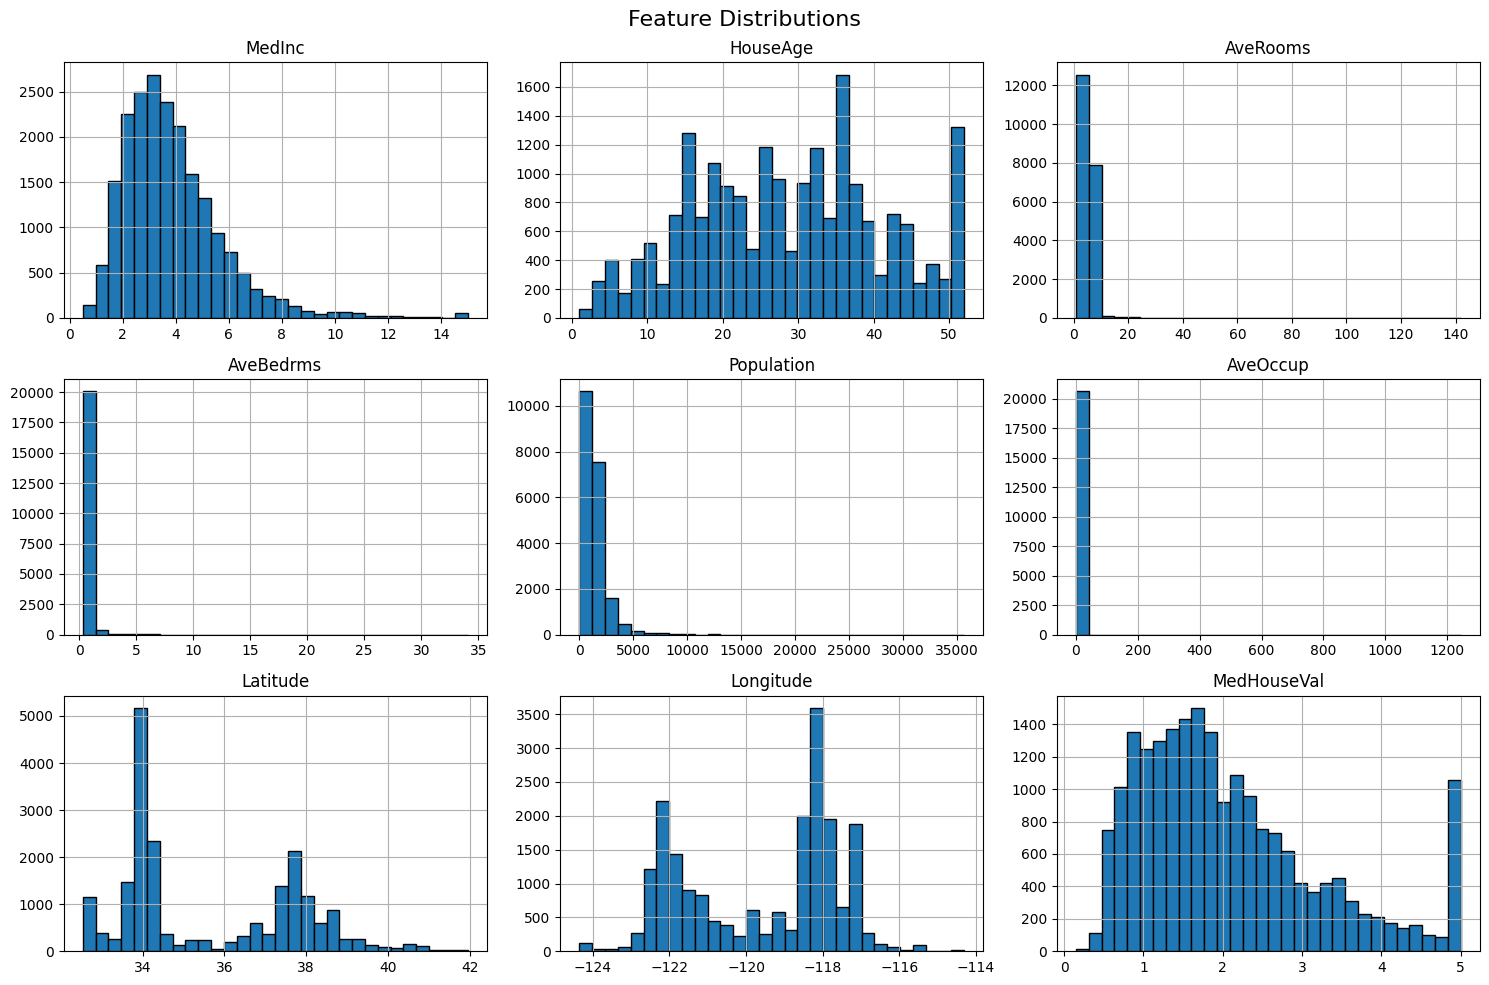

In [4]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


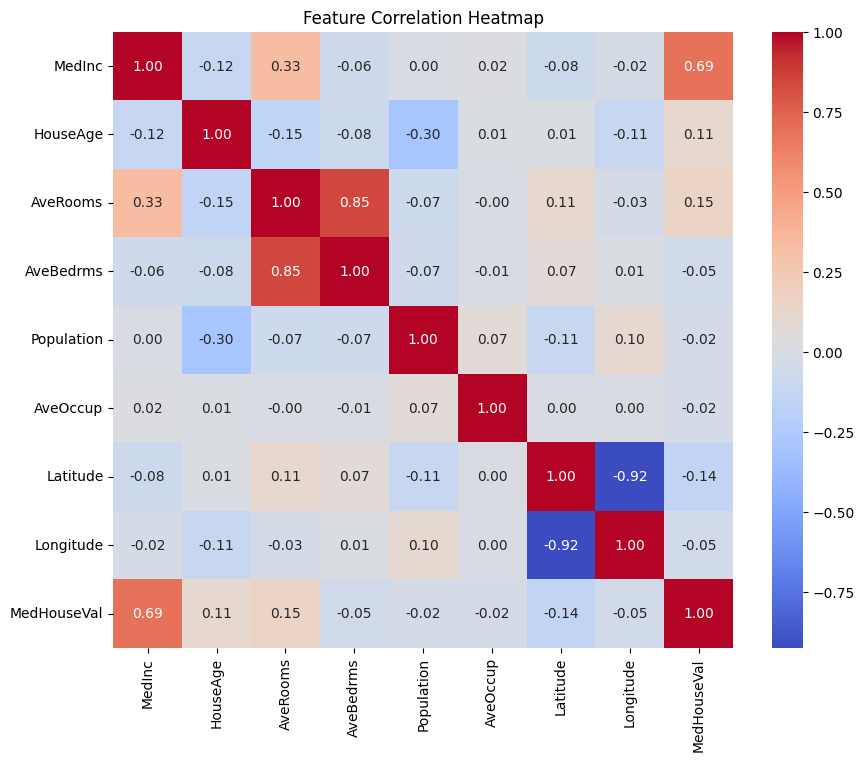

In [5]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


## 🔍 Exploratory Data Analysis (EDA)

### ✅ Key Observations:

- No missing values in the dataset.
- Features like `MedInc`, `Population`, and `AveRooms` are **right-skewed**.
- The target variable `MedHouseVal` is **capped at 5.0**, indicating possible truncation in expensive housing districts.
- Strong positive correlation:
  - `MedInc` (median income) has the highest positive correlation with `MedHouseVal`.
- Weak or negative correlation:
  - `Latitude` and `Longitude` show negative correlation with price (suggesting location trends).


## ⚙️ Data Preprocessing Summary

- Dataset was split 80/20 into training and testing sets using `train_test_split()`.
- Features were scaled using `StandardScaler` to normalize distributions.
- Scaling was done using `.fit_transform()` on training data and `.transform()` on test data to avoid leakage.


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 16512
Testing samples: 4128


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Model Training — Linear Regression**

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred = model.predict(X_test_scaled)


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.75
MAE : 0.53
R² Score: 0.5758


**Model Training-Decision Tree Regression (Non-Linear Model)**

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [12]:
tree_preds = tree_model.predict(X_test_scaled)


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

tree_rmse = np.sqrt(mean_squared_error(y_test, tree_preds))
tree_mae = mean_absolute_error(y_test, tree_preds)
tree_r2 = r2_score(y_test, tree_preds)

print(f"RMSE: {tree_rmse:.2f}")
print(f"MAE : {tree_mae:.2f}")
print(f"R² Score: {tree_r2:.4f}")


RMSE: 0.70
MAE : 0.45
R² Score: 0.6230


**Tuning the Hyperparameter**

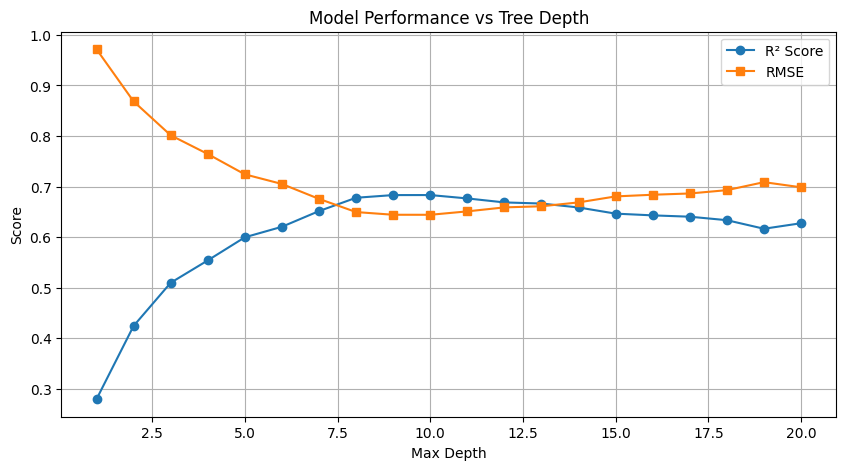

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

depths = list(range(1, 21))
r2_scores = []
rmse_scores = []

for d in depths:
    temp_model = DecisionTreeRegressor(max_depth=d, random_state=42)
    temp_model.fit(X_train_scaled, y_train)
    preds = temp_model.predict(X_test_scaled)
    r2_scores.append(r2_score(y_test, preds))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, preds)))

# Plot performance vs depth
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(depths, r2_scores, marker='o', label='R² Score')
plt.plot(depths, rmse_scores, marker='s', label='RMSE')
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.title("Model Performance vs Tree Depth")
plt.legend()
plt.grid(True)
plt.show()


Train the Tuned Tree Model

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

tuned_tree = DecisionTreeRegressor(max_depth=10, random_state=42)
tuned_tree.fit(X_train_scaled, y_train)
y_tuned_pred = tuned_tree.predict(X_test_scaled)

# Evaluation
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_tuned_pred))
tuned_mae = mean_absolute_error(y_test, y_tuned_pred)
tuned_r2 = r2_score(y_test, y_tuned_pred)

print(f"Tuned Tree RMSE: {tuned_rmse:.2f}")
print(f"Tuned Tree MAE : {tuned_mae:.2f}")
print(f"Tuned Tree R²  : {tuned_r2:.4f}")


Tuned Tree RMSE: 0.64
Tuned Tree MAE : 0.43
Tuned Tree R²  : 0.6833


**Random Forest Regressor** 

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,    # number of trees
    max_depth=10,        # depth of each tree
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
rf_preds = rf_model.predict(X_test_scaled)


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest MAE : {rf_mae:.2f}")
print(f"Random Forest R²  : {rf_r2:.4f}")


Random Forest RMSE: 0.54
Random Forest MAE : 0.37
Random Forest R²  : 0.7739


GridSearchCV


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Retrain

In [22]:
best_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

best_rf.fit(X_train_scaled, y_train)
best_preds = best_rf.predict(X_test_scaled)


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, best_preds))
mae = mean_absolute_error(y_test, best_preds)
r2 = r2_score(y_test, best_preds)

print(f"Final Tuned RF RMSE: {rmse:.2f}")
print(f"Final Tuned RF MAE : {mae:.2f}")
print(f"Final Tuned RF R²  : {r2:.4f}")


Final Tuned RF RMSE: 0.50
Final Tuned RF MAE : 0.33
Final Tuned RF R²  : 0.8058
